## Construction des features et Word embedding

In [12]:
import time
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Lecture des données

In [14]:
data_train = pd.read_csv("../tweet_data/train.csv").fillna("")
data_train_clean_stem = pd.read_csv("../tweet_data/train_clean_stem.csv").fillna("")
data_test_clean_stem = pd.read_csv("../tweet_data/test_clean_stem.csv").fillna("")

In [139]:
# Colonne "text" en matrices pour l'extraction de features
text_train_array = data_train_clean_stem["text_clean"].values
label_train_array = data_train_clean_stem["sentiment"].values
text_test_array = data_test_clean_stem["text_clean"].values
label_test_array = data_test_clean_stem["sentiment"].values

## Features with tensorflow tokenizer

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [181]:
vocab_size = 20000
embedding_dim = 64
max_length = 150
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(text_train_array)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(text_train_array)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(text_test_array)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [182]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(label_train_array)
label_word_index = label_tokenizer.word_index
label_train_sequences = label_tokenizer.texts_to_sequences(label_train_array)
print('labels sequences size :', len(label_train_sequences))
print(label_word_index)

labels sequences size : 27486
{'neutral': 1, 'positive': 2, 'negative': 3}


In [183]:
label_test_sequences = label_tokenizer.texts_to_sequences(label_test_array)

In [184]:
# change to one-dimensional array
label_train_sequences = np.reshape(np.array(label_train_sequences), len(label_train_sequences))
label_test_sequences = np.reshape(np.array(label_test_sequences), len(label_test_sequences))
# in order to values in range[0,3] then 'neutral': 0, 'positive': 1, 'negative': 2
label_train_sequences = label_train_sequences - 1.0
label_test_sequences = label_test_sequences - 1.0

In [185]:
label_test_sequences

array([1., 1., 1., ..., 0., 2., 0.])

## Word embedding and classification

In [186]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [187]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 150, 64)           1280000   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 33        
Total params: 1,280,683
Trainable params: 1,280,683
Non-trainable params: 0
_________________________________________________________________


In [188]:
label_train_sequences.shape

(27486,)

In [189]:
num_epochs = 10
history = model.fit(padded, label_train_sequences, epochs=num_epochs, validation_data=(testing_padded, label_test_sequences))

Train on 27486 samples, validate on 3535 samples
Epoch 1/10
27486/27486 [==============================] - 16s 587us/sample - loss: 1.0825 - accuracy: 0.4045 - val_loss: 1.0738 - val_accuracy: 0.4045
Epoch 2/10
27486/27486 [==============================] - 17s 606us/sample - loss: 0.9530 - accuracy: 0.5365 - val_loss: 0.8111 - val_accuracy: 0.6569
Epoch 3/10
27486/27486 [==============================] - 15s 550us/sample - loss: 0.7386 - accuracy: 0.6993 - val_loss: 0.7575 - val_accuracy: 0.6823
Epoch 4/10
27486/27486 [==============================] - 15s 555us/sample - loss: 0.6579 - accuracy: 0.7385 - val_loss: 0.7088 - val_accuracy: 0.7027
Epoch 5/10
27486/27486 [==============================] - 13s 489us/sample - loss: 0.6008 - accuracy: 0.7664 - val_loss: 0.7072 - val_accuracy: 0.7103
Epoch 6/10
27486/27486 [==============================] - 14s 525us/sample - loss: 0.5575 - accuracy: 0.7890 - val_loss: 0.7100 - val_accuracy: 0.7072
Epoch 7/10
27486/27486 [=====================

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

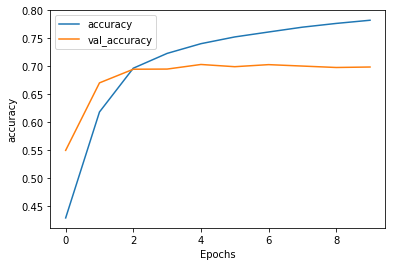

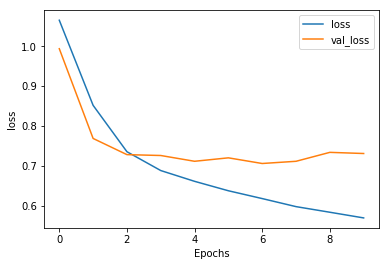

In [171]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## TF IDF

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1,1), norm = False)
data_train_TFIDF = vec.fit_transform(text_train_array)

In [202]:
# vocabulaire extrait des features
vocabulary = vec.get_feature_names()
N_vocabulary = len(vocabulary)
N_vocabulary

24457

In [203]:
data_train_TFIDF.shape

(27486, 24457)